# Credit Risk Scoring Case Study

## Business Understanding

### Problem Statement:

* **Objective**: Assess credit default risk before approving a customer's loan application
* **Approach**: Analyze historical customer records according to whether they were able to repay their loan (`OK`) or whether they were unable to repay their loan (`default`). Predict the probability of credit default for a new customer before the credit is approved.
* **Binary Classification Problem**
** OK = 1
** Default = 0


Dataset source: Ploytechnic University of Catalonia (https://www.cs.upc.edu/~belanche/Docencia/mineria/mineria.html)

## Data

In [1]:
# !pwd

In [2]:
# !wget https://github.com/gastonstat/CreditScoring/raw/master/CreditScoring.csv

## Imports

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

## Data Understanding

In [4]:
df = pd.read_csv("CreditScoring.csv")
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


1. Status	- credit status
2. Seniority -	job seniority (years)
3. Home -	type of home ownership
4. Time -	time of requested loan
5. Age - client's age
6. Marital -	marital status
7. Records -	existance of records
8. Job -	type of job
9. Expenses -	monthly expenses
10. Income -	monthly income
11. Assets -	amount of assets
12. Debt -	amount of credit debt
13. Amount -	amount requested of loan
14. Price	- price of good

## Data Preprocessing

In [5]:
status_enc = {
    1: 'ok',
    2: 'default',
    3: 'unknown',
}

home_enc = {
    0: 'unknown',
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
}

marital_enc = {
    0: 'unknown',
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
}

records_enc = {
    0: 'unknown',
    1: 'no',
    2: 'yes',
}

job_enc = {
    0: 'unknown',
    1: 'fixed',
    2: 'parttime',
    3: 'freelance',
    4: 'others',
}

In [6]:
df['Status'] = df['Status'].map(status_enc)
df['Home'] = df['Home'].map(home_enc)
df['Marital'] = df['Marital'].map(marital_enc)
df['Records'] = df['Records'].map(records_enc)
df['Job'] = df['Job'].map(job_enc)

In [7]:
df

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,default,1,rent,60,39,married,no,fixed,69,92,0,0,900,1020
4451,ok,22,owner,60,46,married,no,fixed,60,75,3000,600,950,1263
4452,default,0,owner,24,37,married,no,parttime,60,90,3500,0,500,963
4453,ok,0,rent,48,23,single,no,freelance,49,140,0,0,550,550


Check NA

In [8]:
df[df.isna().any(axis=1)]

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
3309,NaN,10,private,60,25,single,no,fixed,35,148,3000,0,1500,1888


In [9]:
df = df.drop(df[df.isna().any(axis=1)].index)
df

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,default,1,rent,60,39,married,no,fixed,69,92,0,0,900,1020
4451,ok,22,owner,60,46,married,no,fixed,60,75,3000,600,950,1263
4452,default,0,owner,24,37,married,no,parttime,60,90,3500,0,500,963
4453,ok,0,rent,48,23,single,no,freelance,49,140,0,0,550,550


In [10]:
df.describe().round()

,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price
count,4454.0,4454.0,4454.0,4454.0,4454.0,4454.0,4454.0,4454.0,4454.0
mean,8.0,46.0,37.0,56.0,763488.0,1060578.0,404473.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8704595.0,10218704.0,6344963.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1117.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


Encode Missing

In [11]:
for col in ['Income', 'Assets', 'Debt']:
    df[col] = df[col].replace(to_replace = 99999999, value = np.nan)

In [12]:
df.describe().round()

,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price
count,4454.0,4454.0,4454.0,4454.0,4420.0,4407.0,4436.0,4454.0,4454.0
mean,8.0,46.0,37.0,56.0,131.0,5404.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11574.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1117.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


Inspect Target

In [13]:
df['Status'].value_counts()

ok         3200
default    1254
Name: Status, dtype: int64

### EDA

In [14]:
pip install sweetviz

   ---------------------------------------- 15.1/15.1 MB 4.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


    pandas (>=0.25.*)
            ~~~~~~~^


In [15]:
import sweetviz as sv

In [16]:
# Convert target to numeric
# 0... default
# 1... OK

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(df['Status'])
df['Status_enc'] = enc.transform(df['Status'])
print(df[['Status', 'Status_enc']][:5])

    Status  Status_enc
0       ok           1
1       ok           1
2  default           0
3       ok           1
4       ok           1


In [17]:
report = sv.analyze(df, target_feat="Status_enc")

                                             |       | [  0%]   00:00 -> (? left)


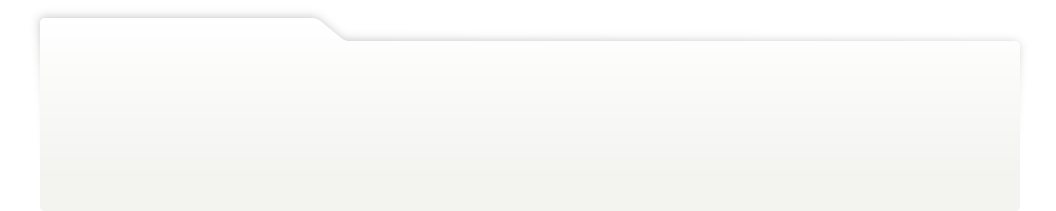
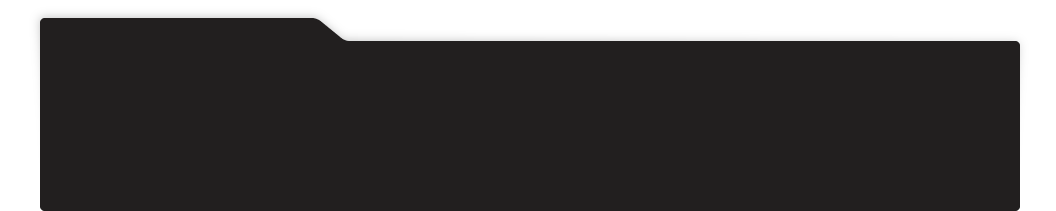
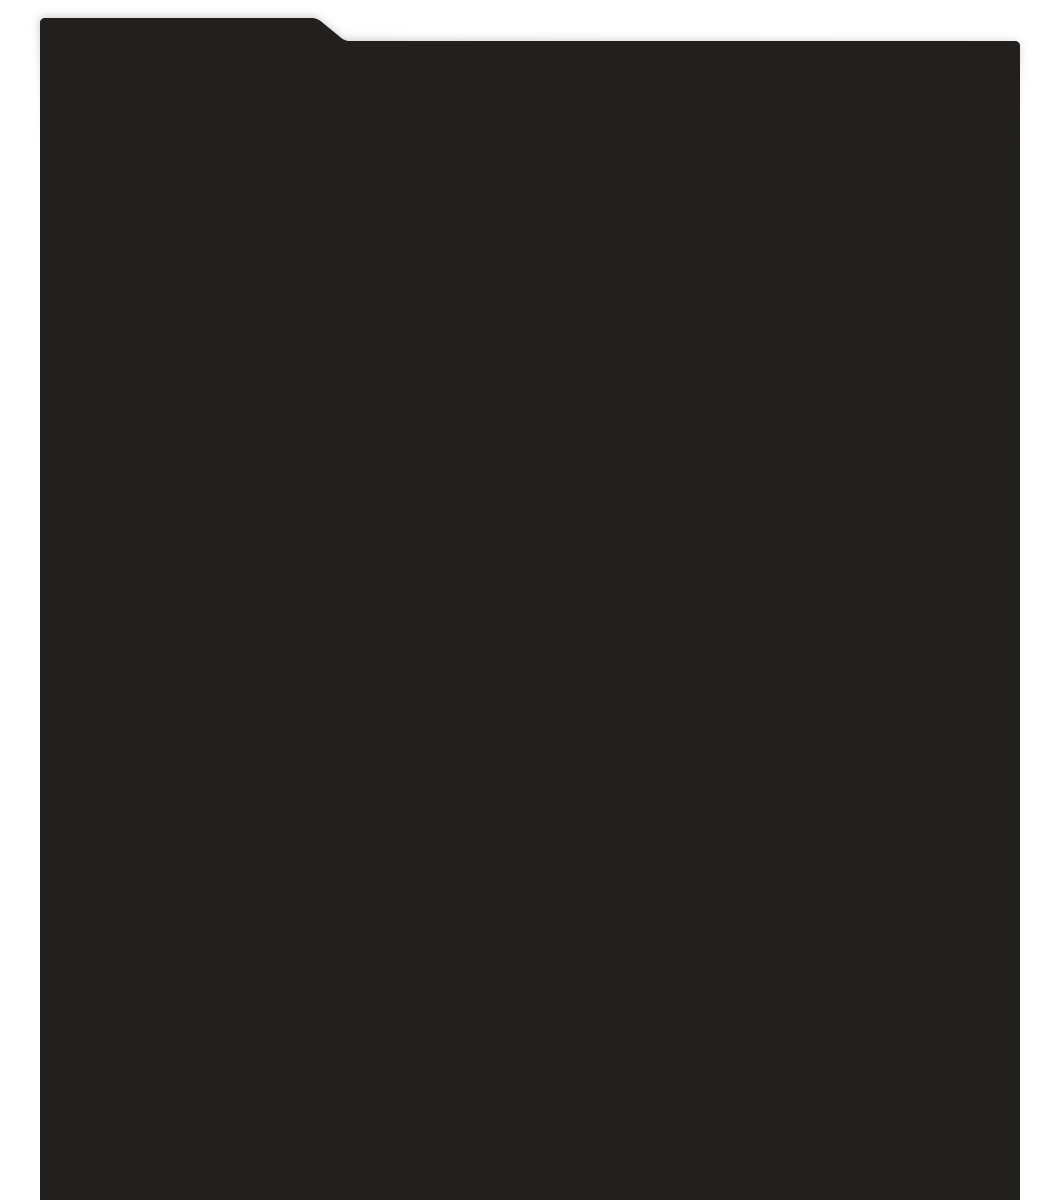
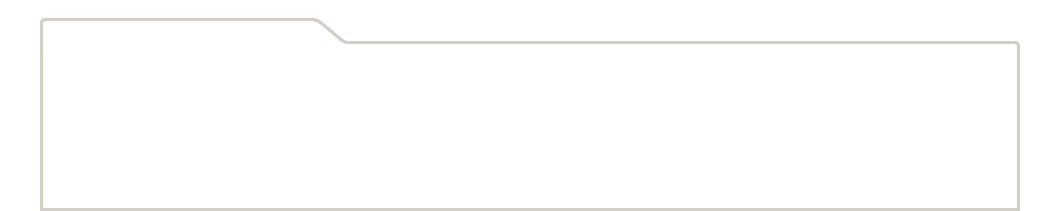
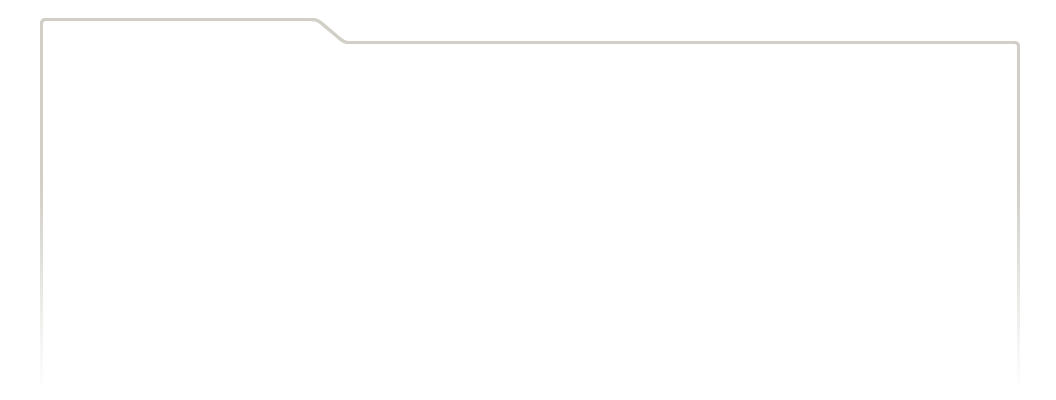
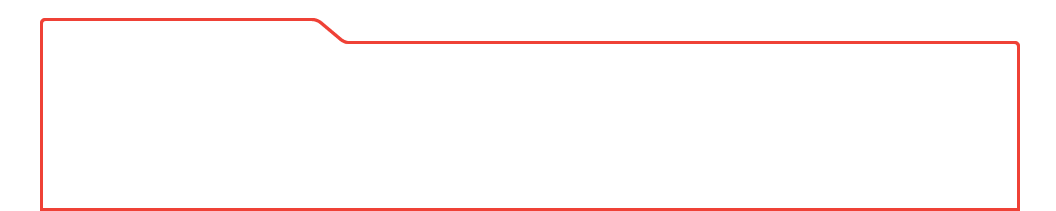
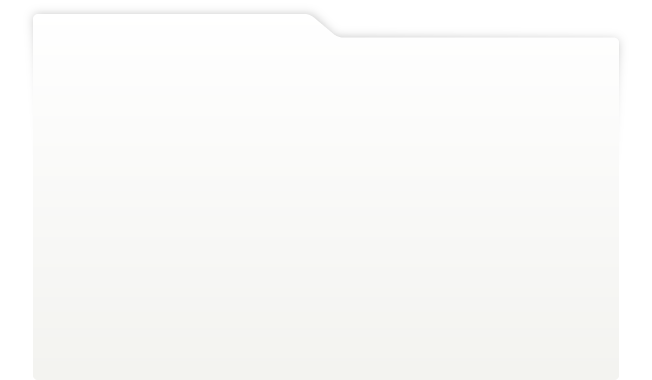
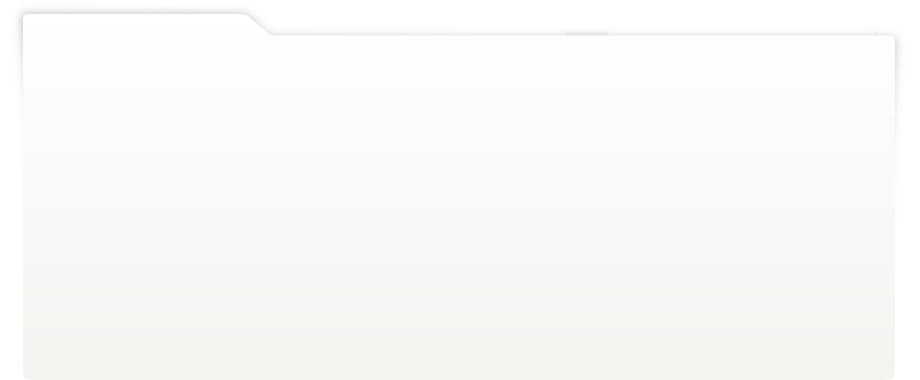
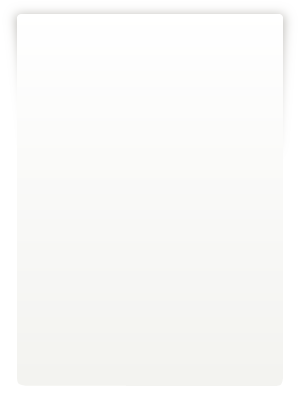
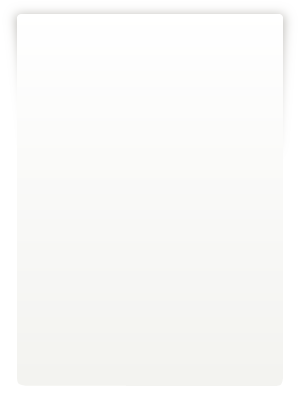
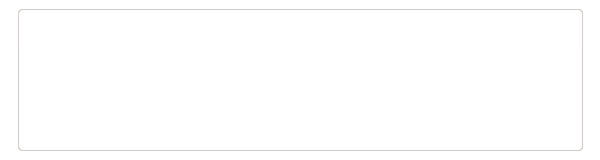
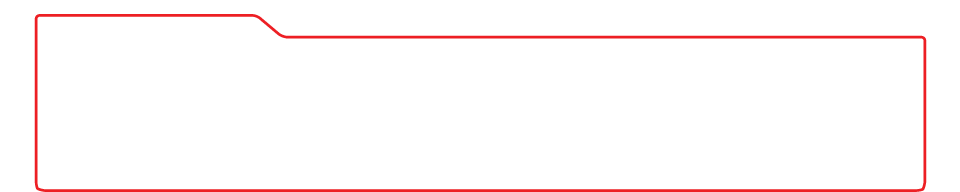
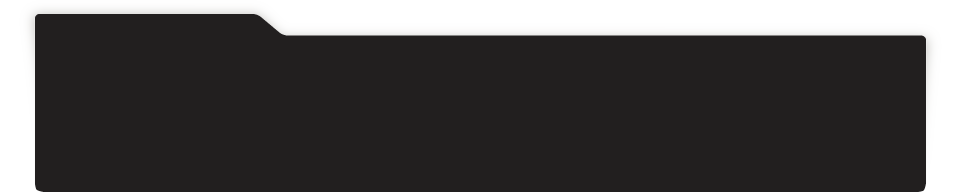
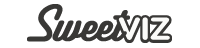
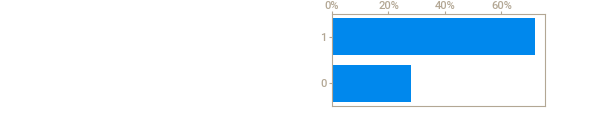
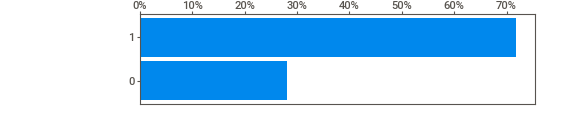
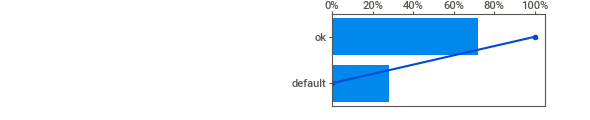
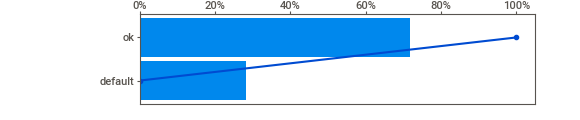
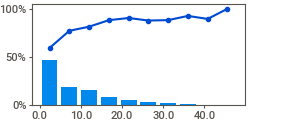
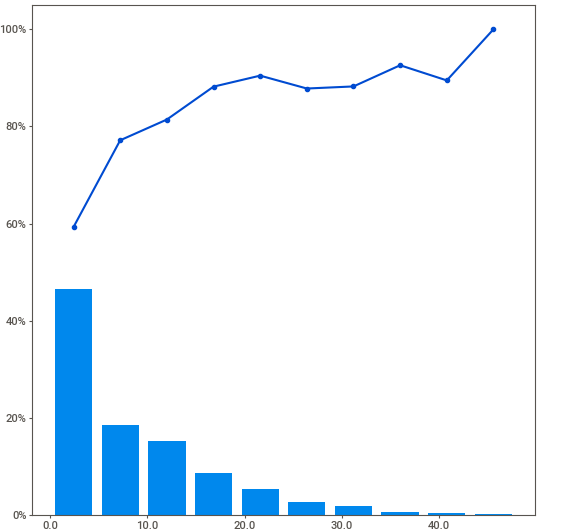
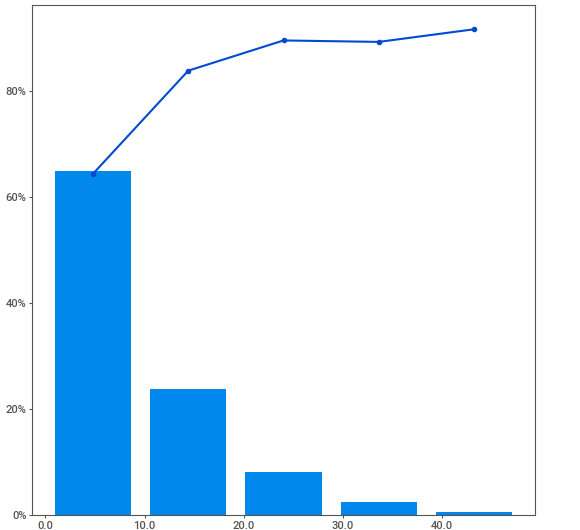
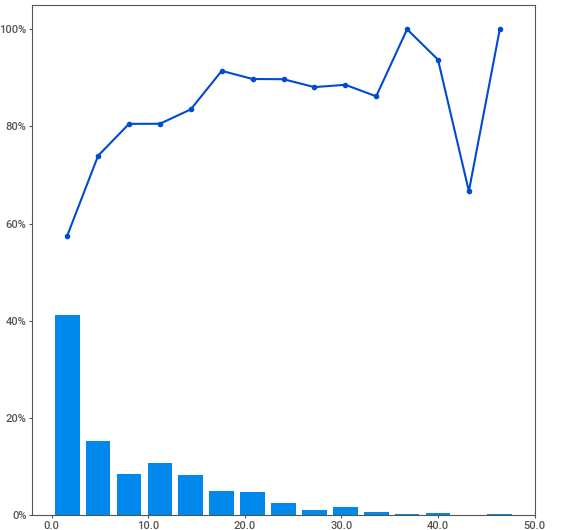
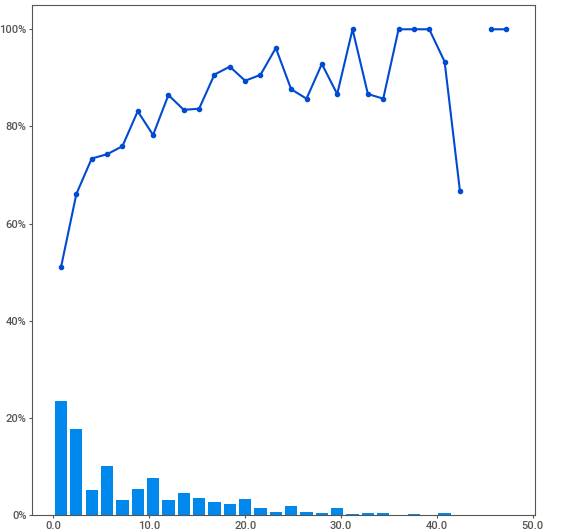
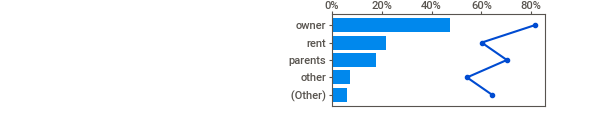
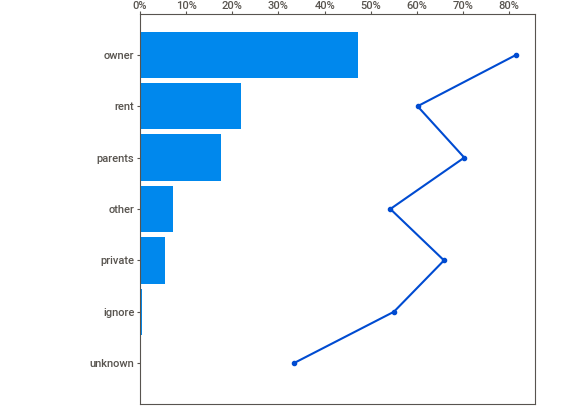
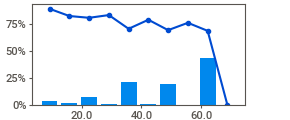
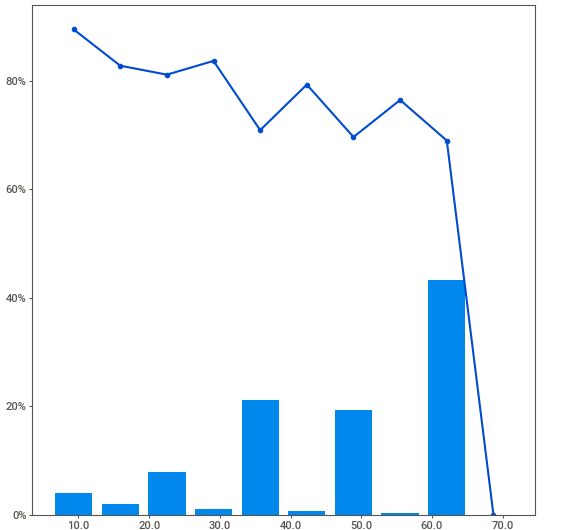
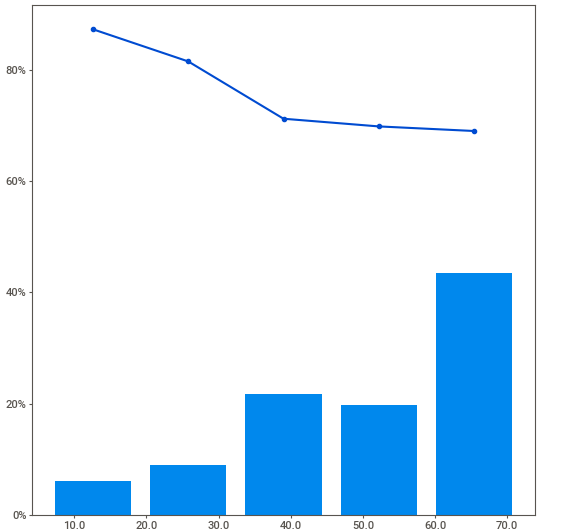
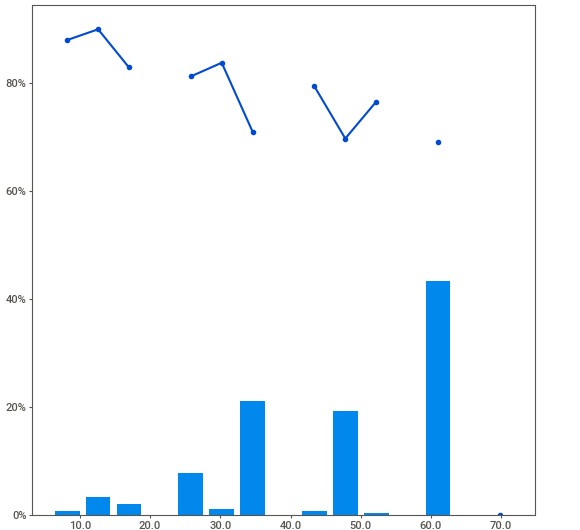
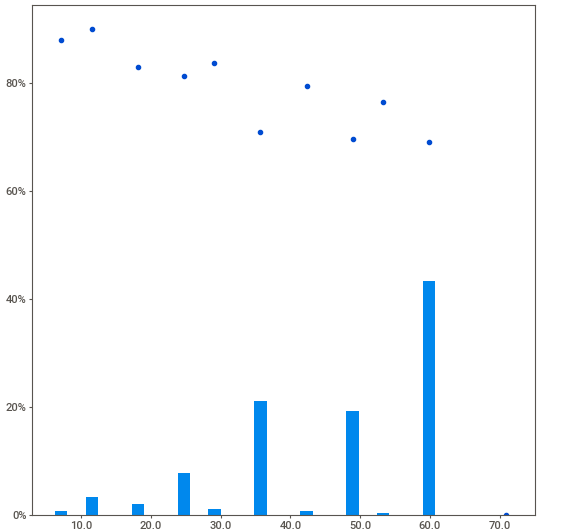
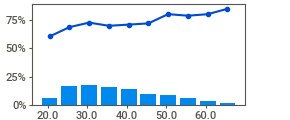
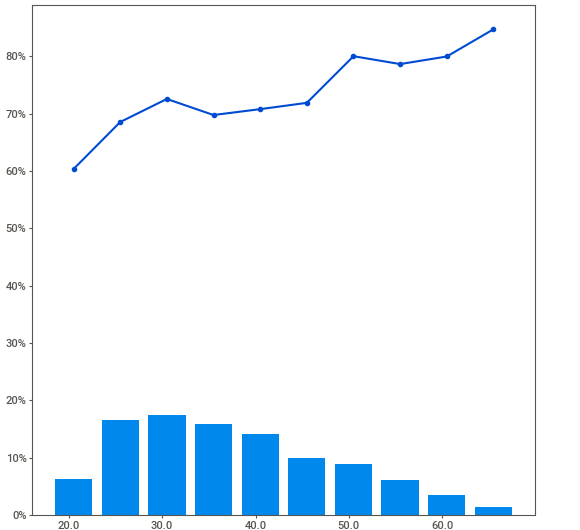
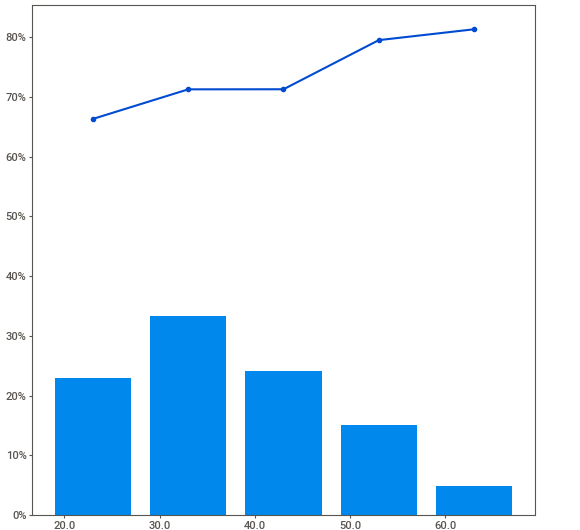
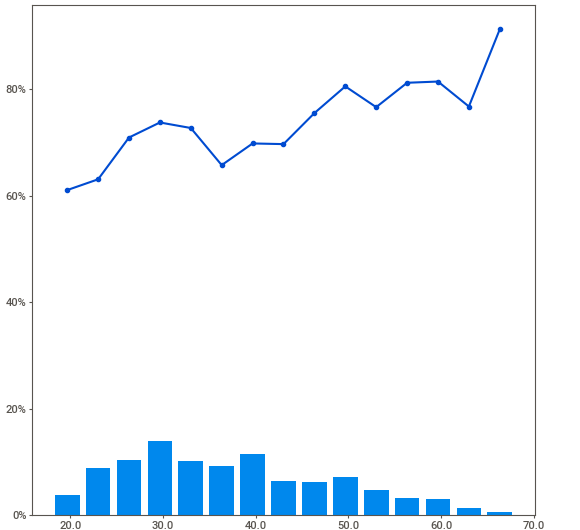
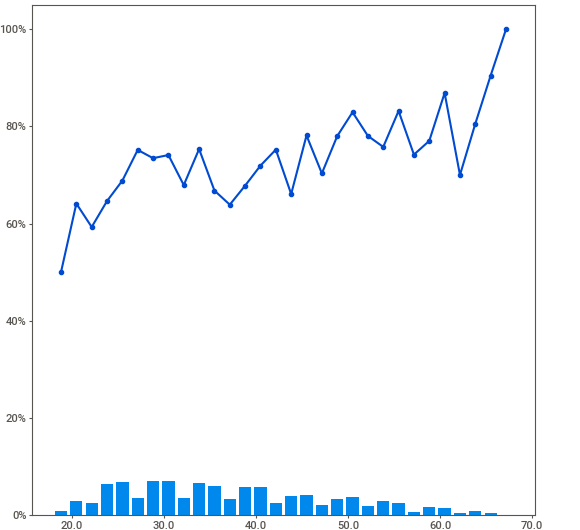
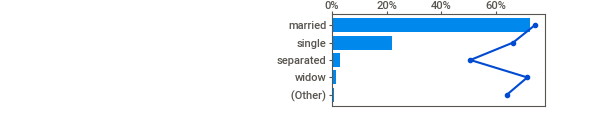
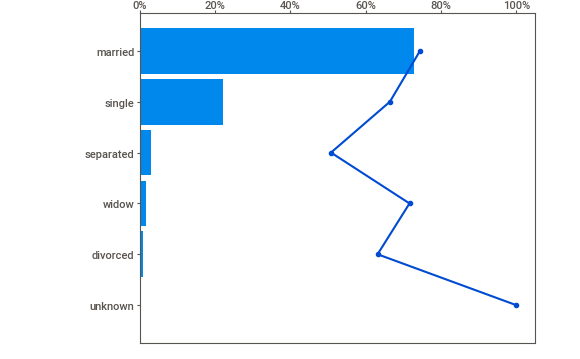
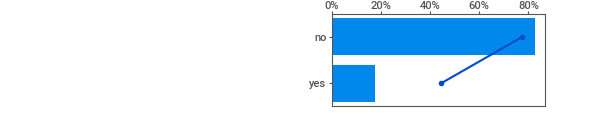
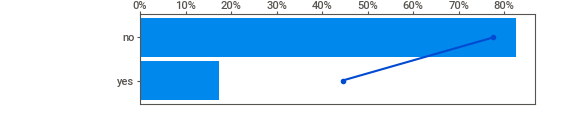
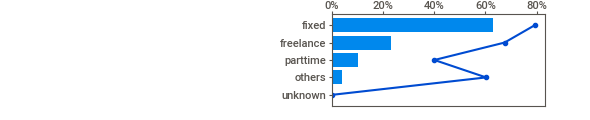
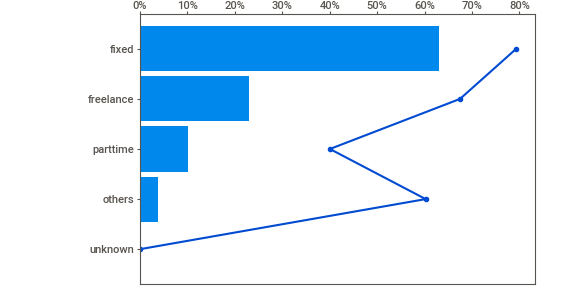
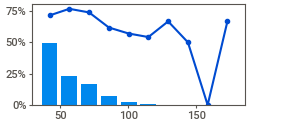
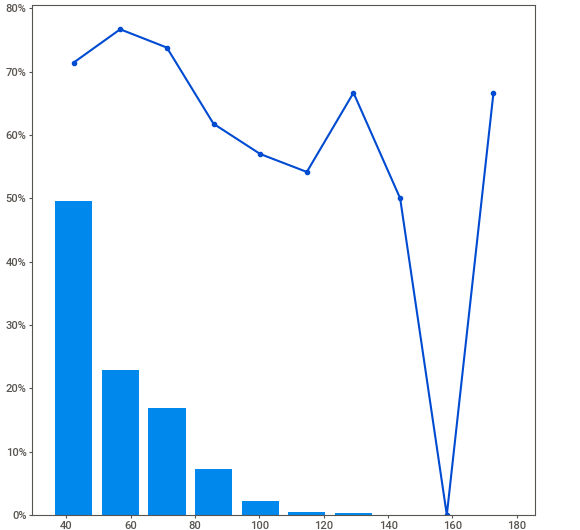
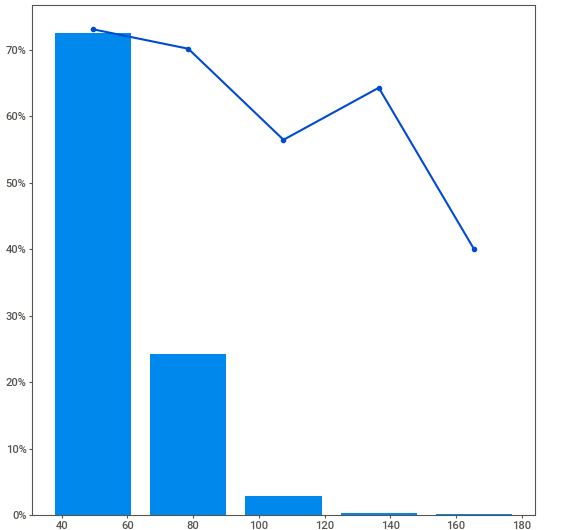
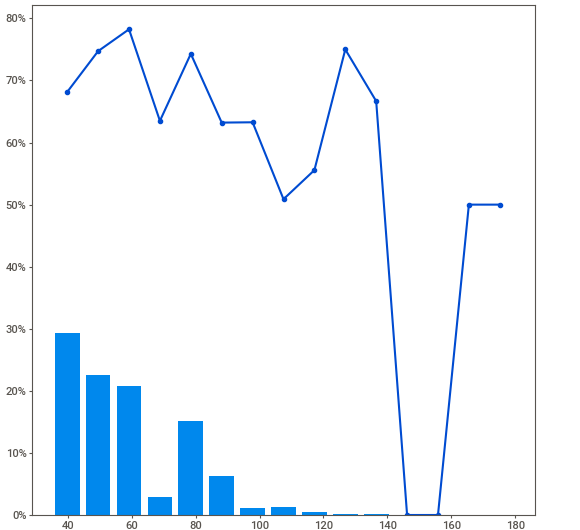
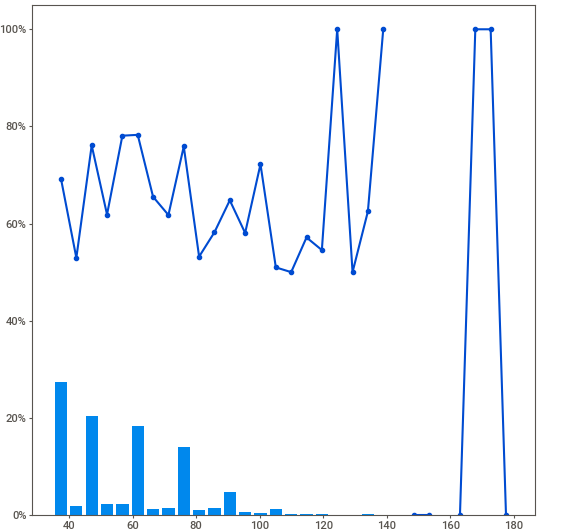
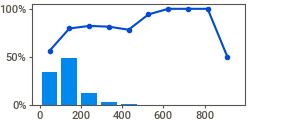
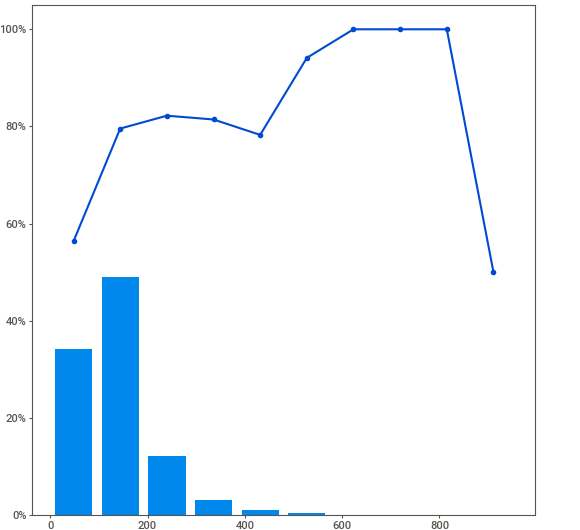
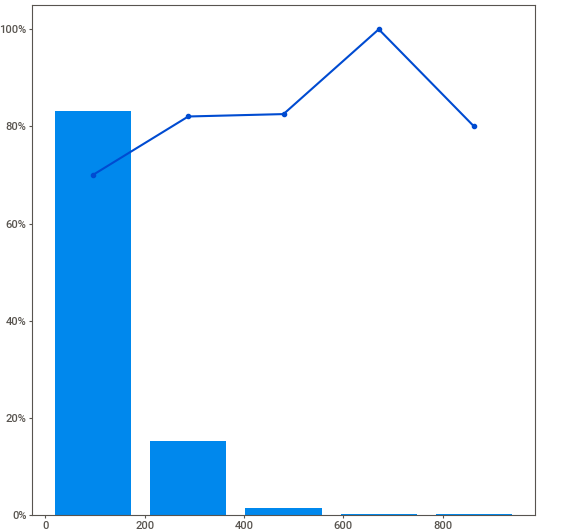
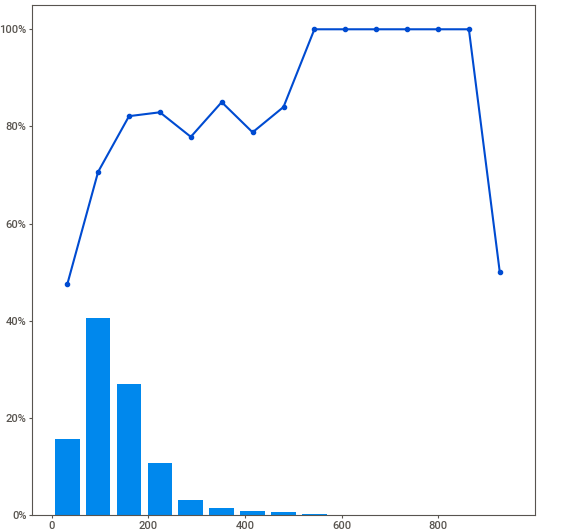
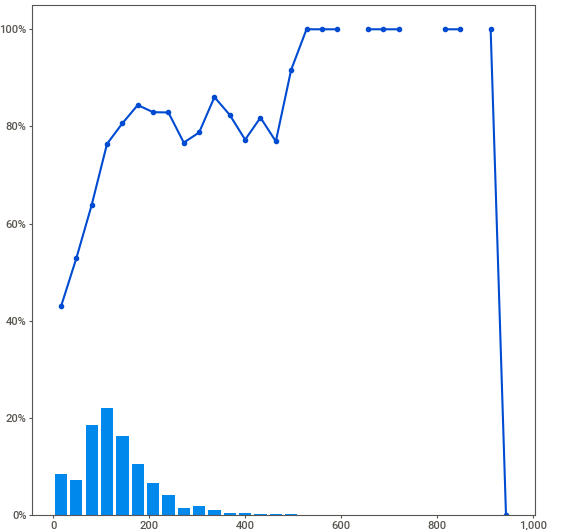
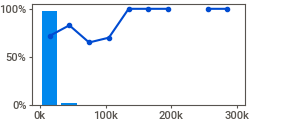
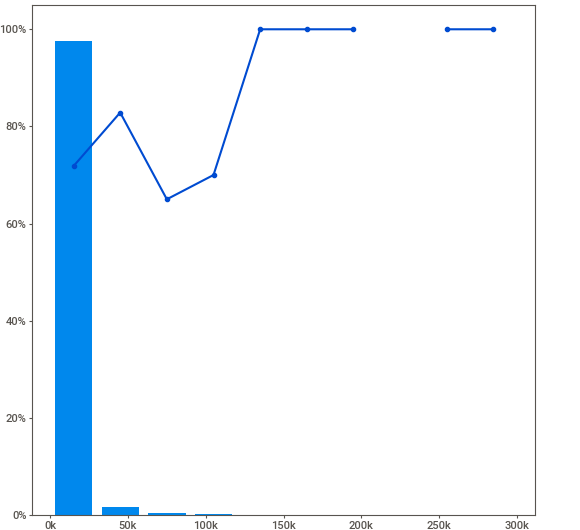
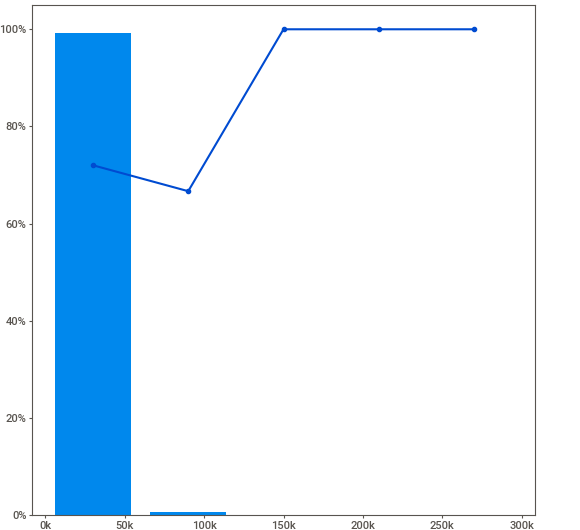
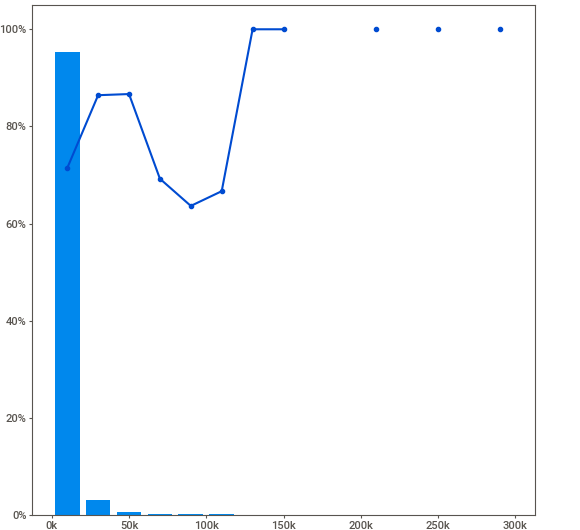
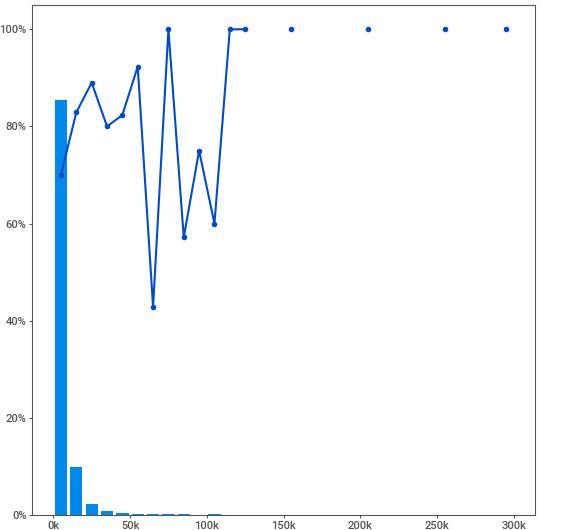
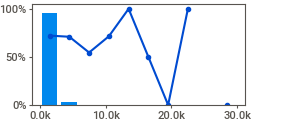
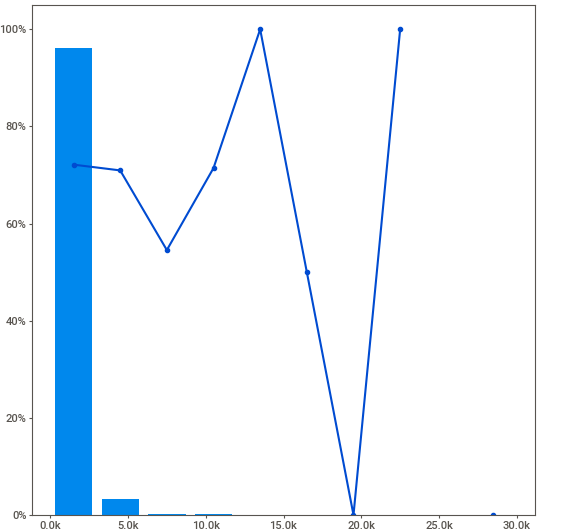
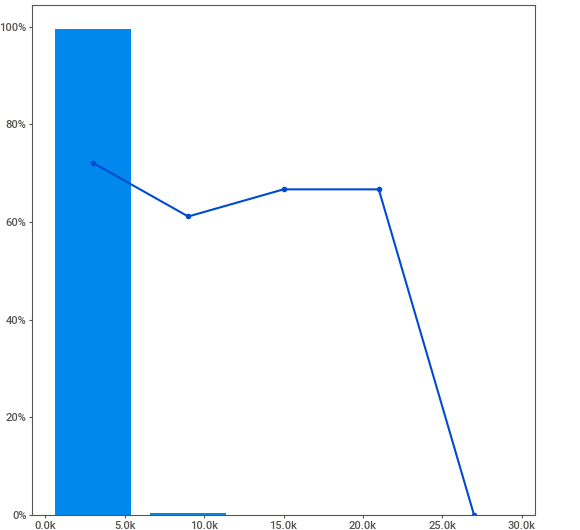
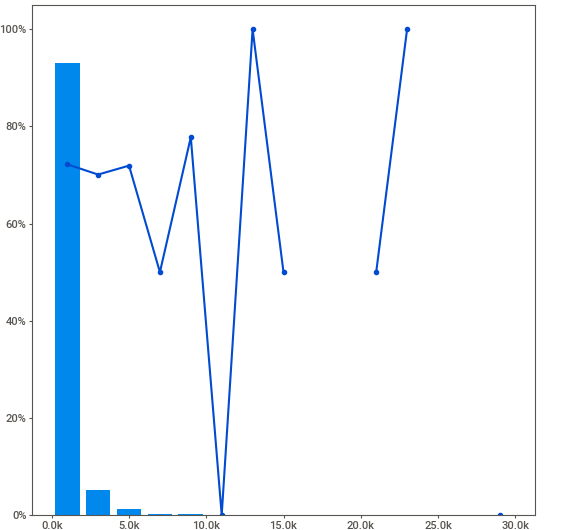
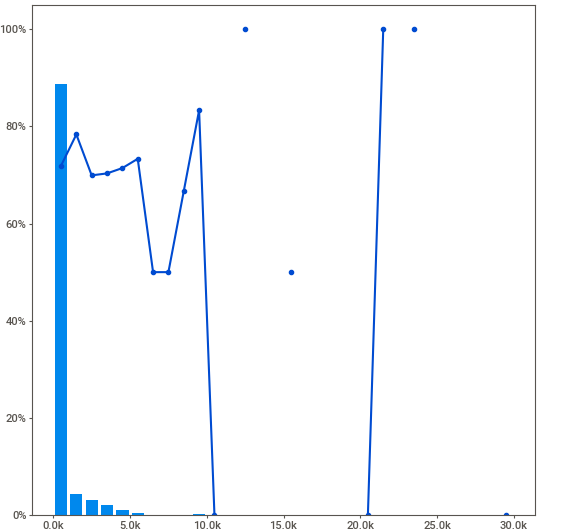
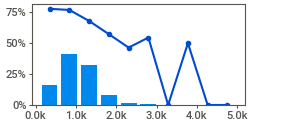
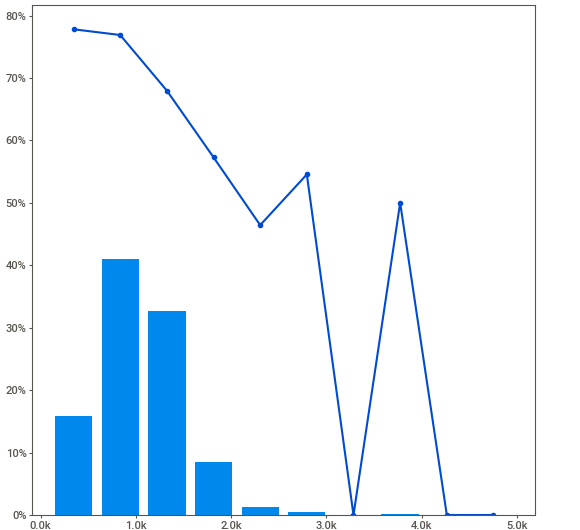
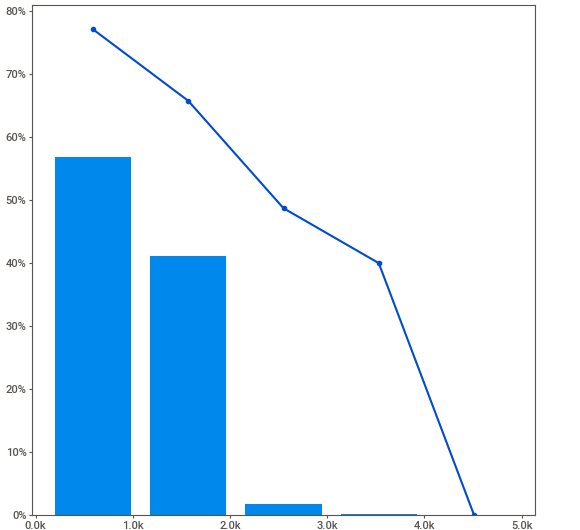
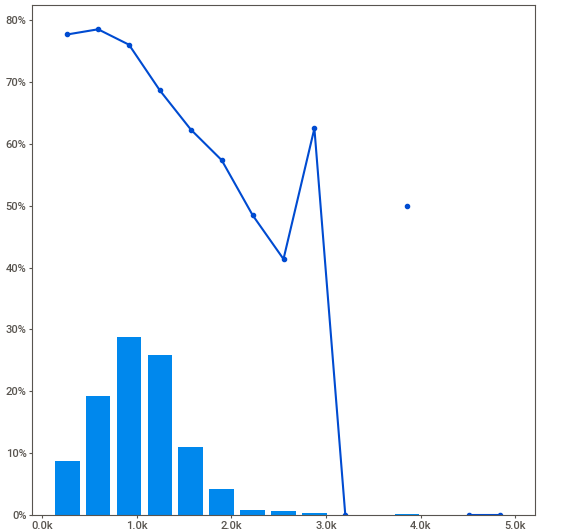
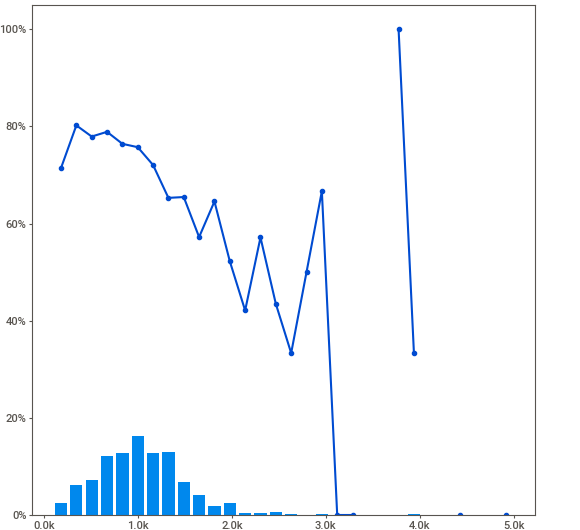
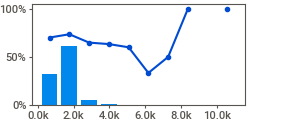
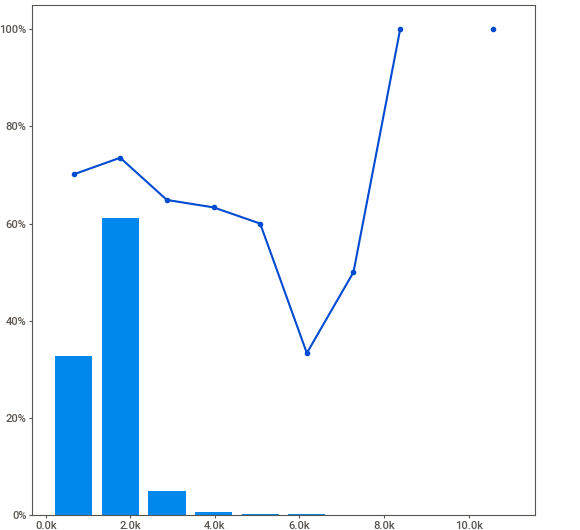
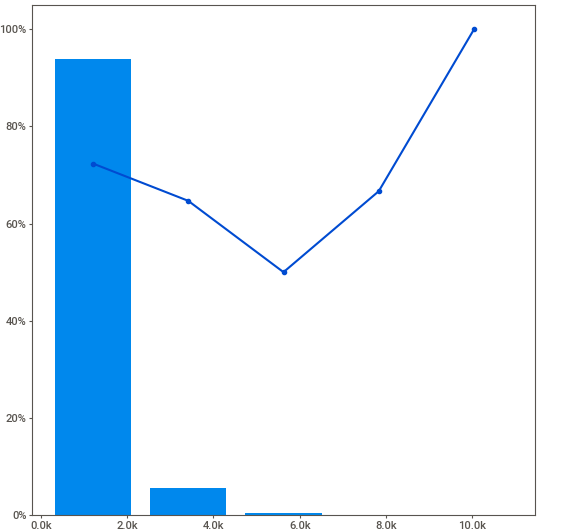
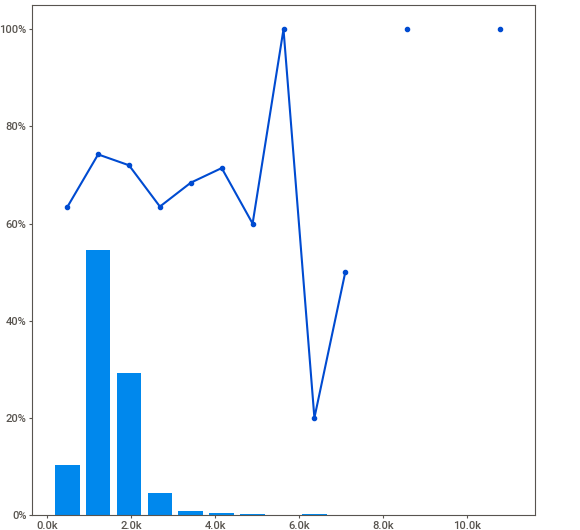
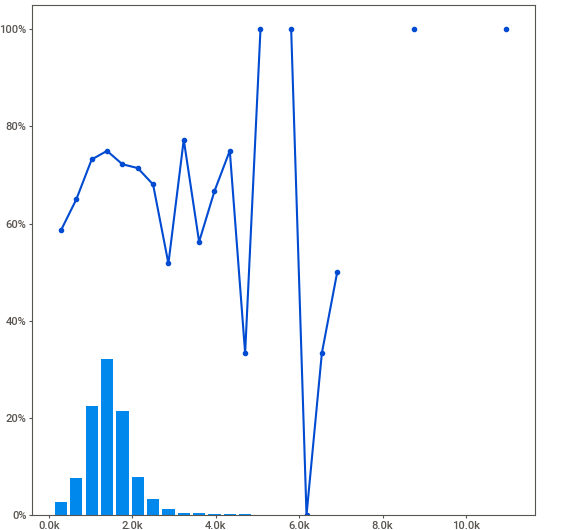
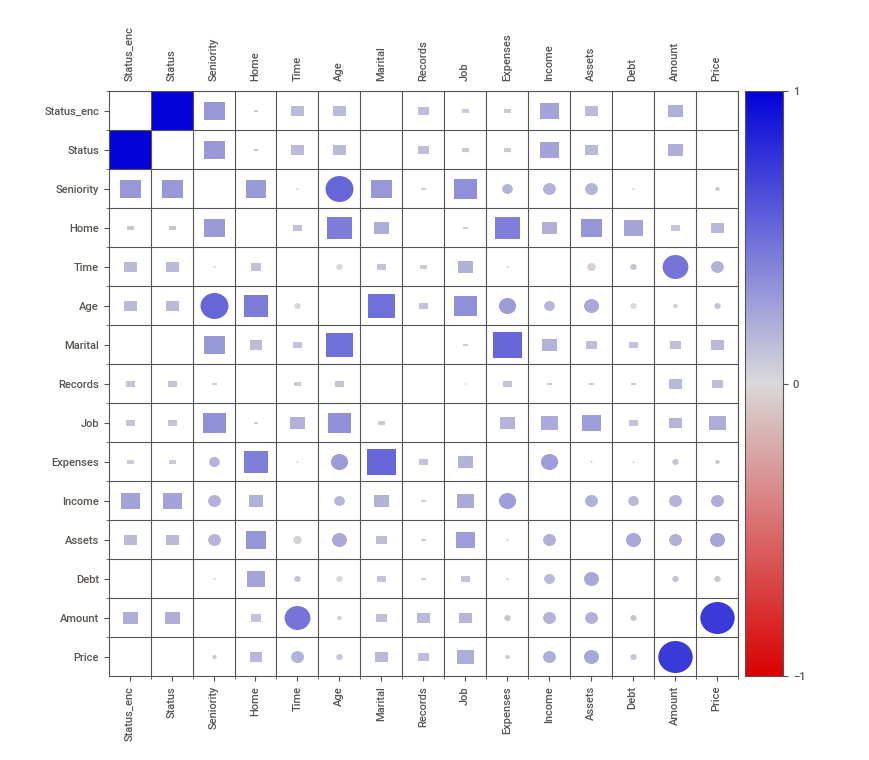
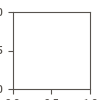

In [18]:
report.show_notebook()

In [19]:
# Remove encoded target
df = df.drop('Status_enc', axis = 1)

## Train-Test Split

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop('Status', axis = 1)
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [21]:
X_train

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
734,30,owner,18,57,married,yes,freelance,75,290.0,NaN,0.0,350,450
981,6,owner,18,33,single,no,fixed,35,163.0,6000.0,0.0,1200,2022
452,2,rent,36,21,single,no,fixed,45,100.0,0.0,0.0,700,825
4120,10,owner,48,36,married,yes,freelance,75,214.0,10000.0,0.0,1143,1143
4218,10,private,36,47,married,yes,fixed,45,60.0,5000.0,0.0,250,1343
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,0,rent,36,24,single,no,parttime,44,85.0,0.0,0.0,375,575
4061,5,rent,54,27,married,no,fixed,47,118.0,0.0,0.0,1500,1600
1346,3,owner,48,32,married,no,freelance,75,65.0,10500.0,1500.0,1500,2155
3455,1,private,60,28,married,no,parttime,60,174.0,6000.0,720.0,1650,1930


## Feature engineering

In [22]:
numeric_cols = X_train.describe().columns
X_train_num = X_train[numeric_cols]

In [23]:
X_train_num = X_train_num.fillna(0)
X_train_num = X_train_num.reset_index(drop = True)

In [24]:
X_train_num

,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price
0,30,18,57,75,290.0,0.0,0.0,350,450
1,6,18,33,35,163.0,6000.0,0.0,1200,2022
2,2,36,21,45,100.0,0.0,0.0,700,825
3,10,48,36,75,214.0,10000.0,0.0,1143,1143
4,10,36,47,45,60.0,5000.0,0.0,250,1343
...,...,...,...,...,...,...,...,...,...
3558,0,36,24,44,85.0,0.0,0.0,375,575
3559,5,54,27,47,118.0,0.0,0.0,1500,1600
3560,3,48,32,75,65.0,10500.0,1500.0,1500,2155
3561,1,60,28,60,174.0,6000.0,720.0,1650,1930


## Categorical features

In [27]:
categories = [list(home_enc.values()), 
              list(marital_enc.values()), 
              list(records_enc.values()), 
              list(job_enc.values())]

from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False, categories = categories)

X_train_categorical = X_train[['Home', 'Marital', 'Records', 'Job']]
X_train_categorical = onehot_encoder.fit_transform(X_train_categorical)

X_train_categorical = pd.DataFrame(X_train_categorical, columns=onehot_encoder.get_feature_names_out())
X_train_categorical

,Home_unknown,Home_rent,Home_owner,Home_private,Home_ignore,Home_parents,Home_other,Marital_unknown,Marital_single,Marital_married,...,Marital_separated,Marital_divorced,Records_unknown,Records_no,Records_yes,Job_unknown,Job_fixed,Job_parttime,Job_freelance,Job_others
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3558,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3559,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3560,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3561,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [28]:
X_train_fe = pd.concat([X_train_num, X_train_categorical], axis = 1)

In [29]:
X_train_fe

,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price,Home_unknown,...,Marital_separated,Marital_divorced,Records_unknown,Records_no,Records_yes,Job_unknown,Job_fixed,Job_parttime,Job_freelance,Job_others
0,30,18,57,75,290.0,0.0,0.0,350,450,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,6,18,33,35,163.0,6000.0,0.0,1200,2022,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,36,21,45,100.0,0.0,0.0,700,825,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,10,48,36,75,214.0,10000.0,0.0,1143,1143,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,10,36,47,45,60.0,5000.0,0.0,250,1343,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3558,0,36,24,44,85.0,0.0,0.0,375,575,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3559,5,54,27,47,118.0,0.0,0.0,1500,1600,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3560,3,48,32,75,65.0,10500.0,1500.0,1500,2155,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3561,1,60,28,60,174.0,6000.0,720.0,1650,1930,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## Decision Tree

### Training

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
y_train[y_train.isna()]

Series([], Name: Status, dtype: object)

In [32]:
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(X_train_fe, y_train)

DecisionTreeClassifier(max_depth=3)

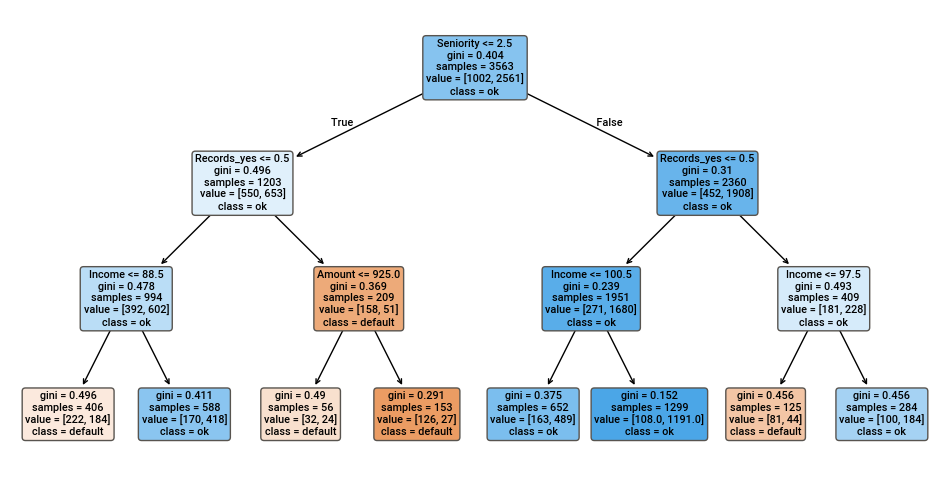

In [33]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
plt.figure(figsize = (12,6))
plot_tree(dt, feature_names = X_train_fe.columns, 
          class_names = y_train.unique(),
          filled = True,
          rounded = True); 

In [34]:
from sklearn.tree import export_text
tree_rules = export_text(dt, feature_names = list(X_train_fe.columns))
print(tree_rules)

|--- Seniority <= 2.50
|   |--- Records_yes <= 0.50
|   |   |--- Income <= 88.50
|   |   |   |--- class: default
|   |   |--- Income >  88.50
|   |   |   |--- class: ok
|   |--- Records_yes >  0.50
|   |   |--- Amount <= 925.00
|   |   |   |--- class: default
|   |   |--- Amount >  925.00
|   |   |   |--- class: default
|--- Seniority >  2.50
|   |--- Records_yes <= 0.50
|   |   |--- Income <= 100.50
|   |   |   |--- class: ok
|   |   |--- Income >  100.50
|   |   |   |--- class: ok
|   |--- Records_yes >  0.50
|   |   |--- Income <= 97.50
|   |   |   |--- class: default
|   |   |--- Income >  97.50
|   |   |   |--- class: ok



### Evaluation

Score on training data

In [35]:
from sklearn.metrics import roc_auc_score
y_pred = dt.predict_proba(X_train_fe)[:,1]
roc_auc_score(y_train, y_pred)

0.7673881054758893

Score on testing data

In [38]:
# Feature Engineering Pipeline

# Numerical Features
X_test_num = X_test[X_test.describe().columns]
X_test_num = X_test_num.fillna(0).reset_index(drop = True)

# Categorical Features
onehot_encoder = OneHotEncoder(sparse_output =False, categories = categories)

X_test_categorical = X_test[['Home', 'Marital', 'Records', 'Job']]
X_test_categorical = onehot_encoder.fit_transform(X_test_categorical)

X_test_categorical = pd.DataFrame(X_test_categorical, columns=onehot_encoder.get_feature_names_out())

# Concat num + cat features
X_test_fe = pd.concat([X_test_num, X_test_categorical], axis = 1)

In [39]:
from sklearn.metrics import roc_auc_score
y_pred = dt.predict_proba(X_test_fe)[:,1]
roc_auc_score(y_test, y_pred)

0.7602777156767767

## Random Forest

### Training

Random Forest with Scikit-learn

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 8, oob_score = True)
rf.fit(X_train_fe, y_train)

RandomForestClassifier(max_depth=8, oob_score=True)

Check Out-Of-Bag Score

In [42]:
rf.oob_score_

0.7928711759753018

Inspect trees

In [43]:
rf.estimators_

[DecisionTreeClassifier(max_depth=8, max_features='sqrt', random_state=640547597),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt', random_state=775865439),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt',
                        random_state=1774378533),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt', random_state=451848223),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt',
                        random_state=1825228866),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt', random_state=878612980),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt',
                        random_state=1393294947),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt', random_state=111027261),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt',
                        random_state=2033975072),
 DecisionTreeClassifier(max_depth=8, max_features='sqrt',
                        random_state=1749308655),
 DecisionTreeClassifier(max_depth=8, max_feat

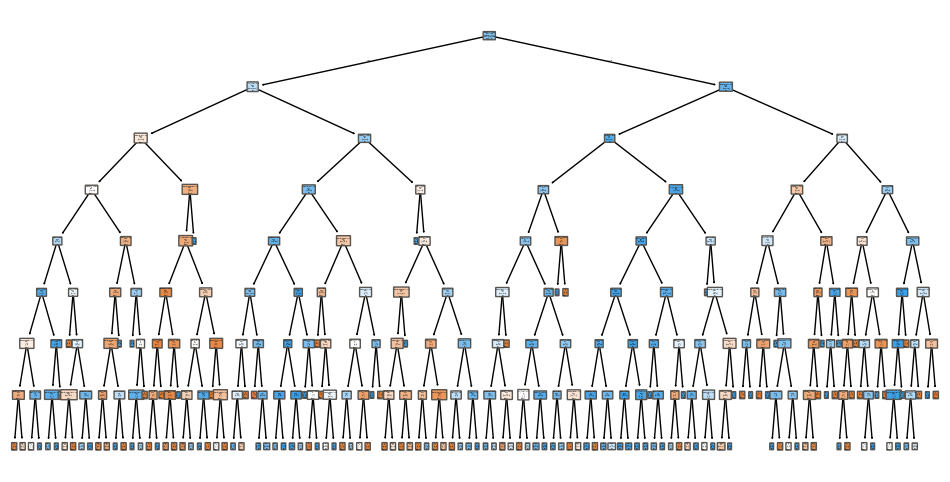

In [44]:
plt.figure(figsize = (12,6))
plot_tree(rf.estimators_[10], feature_names = X_train_fe.columns,label = 'root', 
          class_names = y_train.unique(),
          filled = True,
          rounded = True); 


Grid search

In [45]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()

# Define grid
parameters = {'n_estimators': [10, 20, 50, 100], 'max_depth': [5, 6, 9, 12, 15]}

k = 5
grid_search = GridSearchCV(model, parameters, cv = k, scoring = "roc_auc")
grid_search.fit(X_train_fe, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 6, 9, 12, 15],
                         'n_estimators': [10, 20, 50, 100]},
             scoring='roc_auc')

In [46]:
pd.DataFrame(grid_search.cv_results_).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,0.422771,0.020907,0.023240,0.002296,9,100,"{'max_depth': 9, 'n_estimators': 100}",0.842516,0.876613,0.830643,0.815518,0.808096,0.834677,0.024125,1
7,0.338814,0.035148,0.018426,0.003333,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.837288,0.873669,0.834600,0.814365,0.799189,0.831822,0.025133,2
10,0.194708,0.002123,0.012062,0.000169,9,50,"{'max_depth': 9, 'n_estimators': 50}",0.843711,0.873766,0.827232,0.810752,0.800186,0.831129,0.025939,3
6,0.183888,0.021966,0.013400,0.003554,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.838794,0.874145,0.831160,0.808936,0.801006,0.830808,0.025724,4
15,0.452415,0.013273,0.021312,0.000961,12,100,"{'max_depth': 12, 'n_estimators': 100}",0.832128,0.872561,0.829571,0.815527,0.802061,0.830370,0.023688,5
19,0.659890,0.047234,0.036618,0.001034,15,100,"{'max_depth': 15, 'n_estimators': 100}",0.839086,0.873300,0.818387,0.815503,0.804985,0.830252,0.024199,6
14,0.242452,0.011348,0.014194,0.000980,12,50,"{'max_depth': 12, 'n_estimators': 50}",0.831322,0.880082,0.817290,0.816992,0.804893,0.830116,0.026348,7
2,0.176489,0.031385,0.013849,0.002584,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.833596,0.870073,0.832934,0.815752,0.793408,0.829153,0.025163,8
3,0.336743,0.049283,0.018415,0.001620,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.835996,0.874019,0.831725,0.806572,0.795312,0.828725,0.027278,9
18,0.266290,0.034703,0.018411,0.005420,15,50,"{'max_depth': 15, 'n_estimators': 50}",0.835320,0.862105,0.820385,0.802944,0.802656,0.824682,0.022315,10


Retrain on full data set

In [47]:
# Retrain on full dataset
rf = grid_search.best_estimator_
rf.fit(X_train_fe, y_train)

RandomForestClassifier(max_depth=9)

### Evaluation

Test set performance

In [48]:
y_pred = rf.predict_proba(X_test_fe)[:,1]
roc_auc_score(y_test, y_pred)

0.8337618302407036

### Feature Importance

#### PDP - Partial Dependence Plots

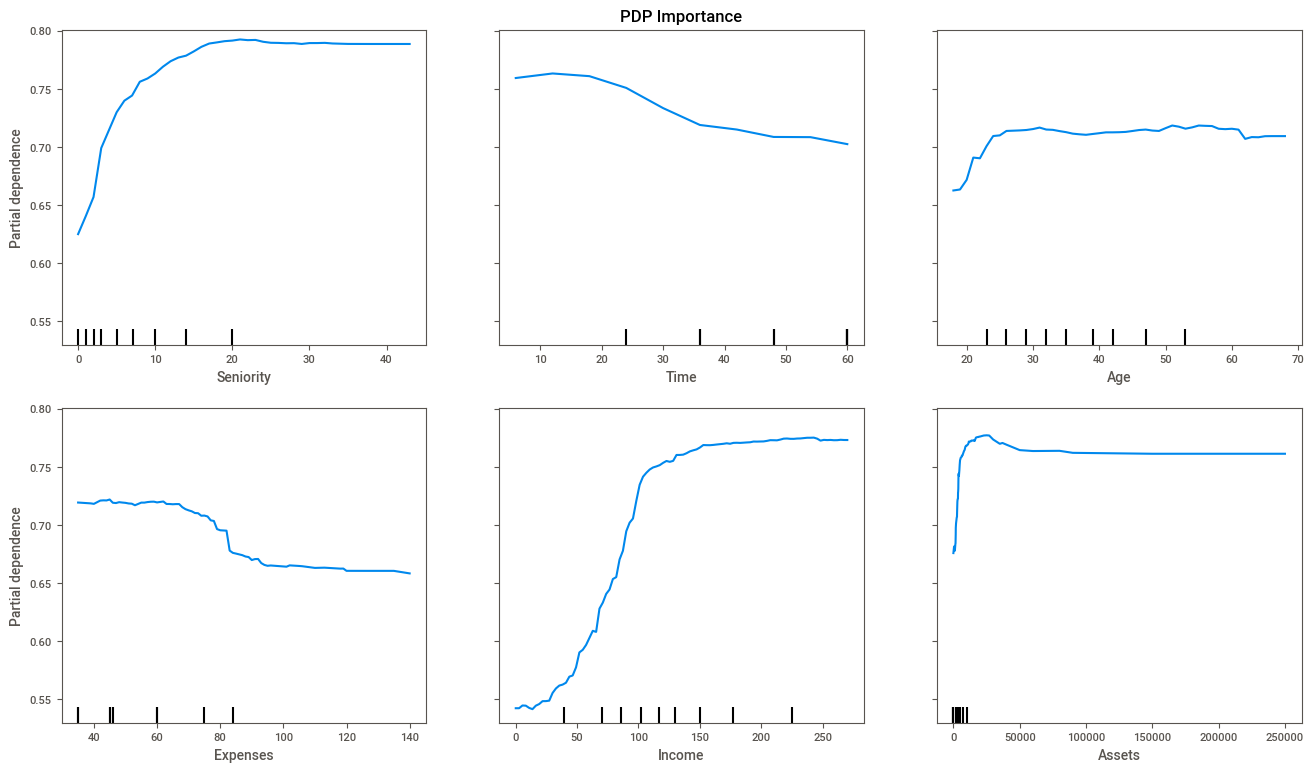

In [52]:
from sklearn.inspection import PartialDependenceDisplay
fig, ax = plt.subplots(figsize=(16, 9))
ax.set_title("PDP Importance")
pdp_features = X_test_fe.columns[:6]
PartialDependenceDisplay.from_estimator(rf, X_test_fe, pdp_features, ax=ax);

ValueError: cannot reshape array of size 1 into shape (2)

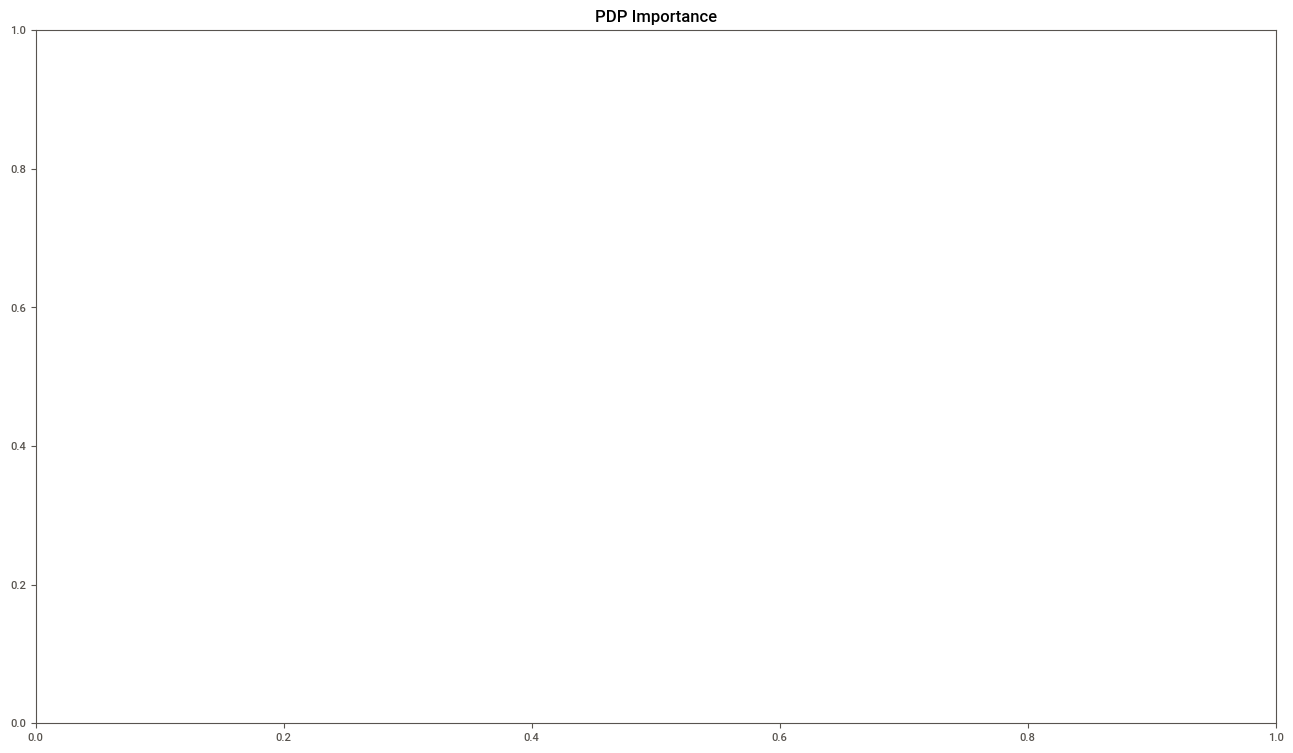

In [53]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.set_title("PDP Importance")
pdp_features = X_test_fe.columns[6:12]
PartialDependenceDisplay.from_estimator(rf, X_test_fe, pdp_features, ax=ax);

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.set_title("PDP Importance")
pdp_features = X_test_fe.columns[12:18]
PartialDependenceDisplay.from_estimator(rf, X_test_fe, pdp_features, ax=ax);

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.set_title("PDP Importance")
pdp_features = X_test_fe.columns[18:24]
PartialDependenceDisplay.from_estimator(rf, X_test_fe, pdp_features, ax=ax);

ValueError: cannot reshape array of size 1 into shape (2)

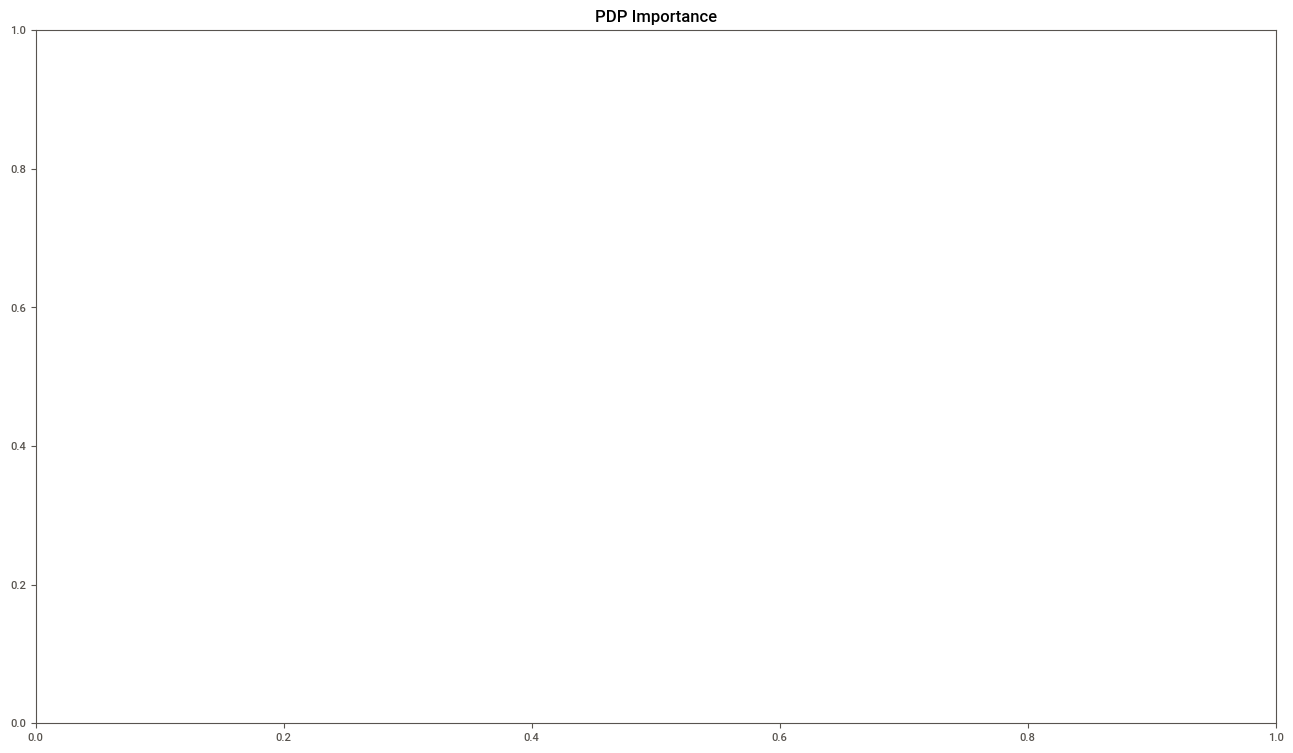

In [51]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.set_title("PDP Importance")
pdp_features = X_test_fe.columns[24:30]
PartialDependenceDisplay.from_estimator(rf, X_test_fe, pdp_features, ax=ax);

### Permutation Feature Importance

In [55]:
from sklearn.inspection import permutation_importance

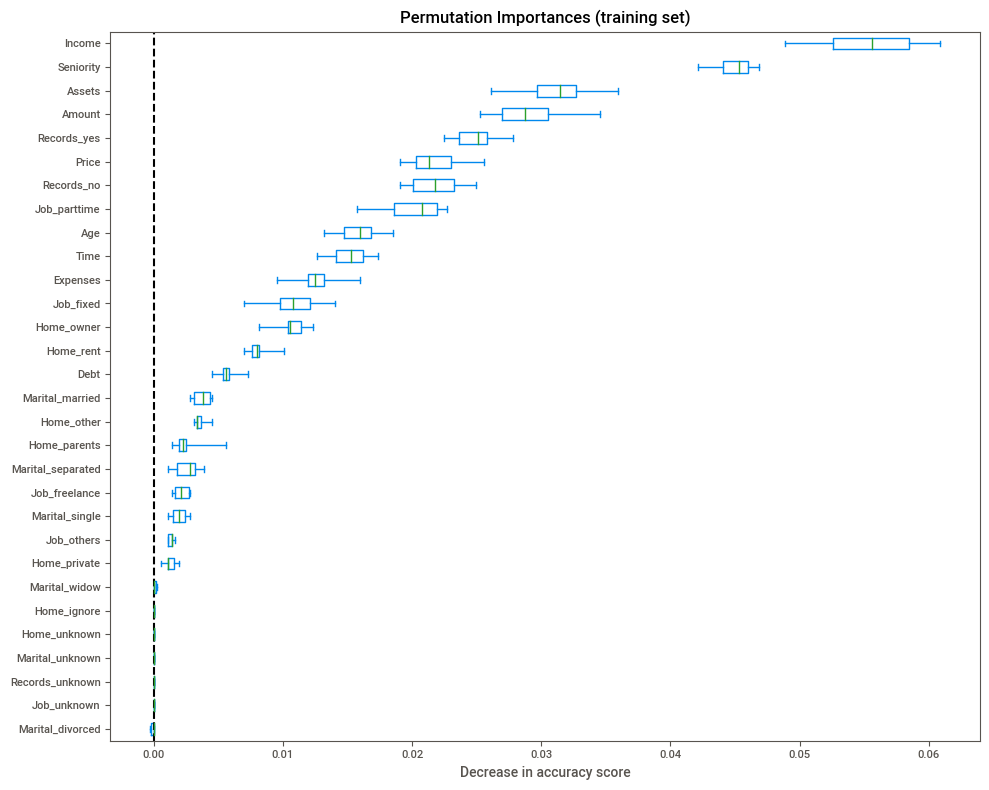

In [56]:
result = permutation_importance(rf, X_train_fe, y_train, n_repeats=10, random_state=123)
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_train_fe.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10, figsize = (10,8))
ax.set_title("Permutation Importances (training set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

## Boosting - XGBoost

In [60]:
import xgboost as xgb

Encode target to numierc

In [61]:
status_enc = {
    'default': 0,
    'ok': 1
}

y_train_enc = y_train.map(status_enc)

print(y_train[:5], y_train_enc[:5])

734     default
981          ok
452     default
4120         ok
4218         ok
Name: Status, dtype: object 734     0
981     1
452     0
4120    1
4218    1
Name: Status, dtype: int64


Create `DMatrix`

In [62]:
train_dm = xgb.DMatrix(X_train_fe, y_train_enc, feature_names=list(X_train_fe.columns))

In [63]:
train_dm

Set XGBoost hyper parameters

In [66]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'seed': 1,
    'verbosity': 0
}
# seed=1 is not available now, instead use verbosity=0,1,2 

### Train Model

Check performance with cross-validation

In [67]:
cv_results = xgb.cv(xgb_params, train_dm, num_boost_round = 500, nfold=5, metrics={'auc'}, seed=123)
cv_results

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.860527,3.359365e-03,0.776908,0.012461
1,0.886459,3.906199e-03,0.801940,0.009283
2,0.900792,4.339210e-03,0.809564,0.007559
3,0.910833,4.639931e-03,0.817815,0.009302
4,0.918419,3.755099e-03,0.819528,0.008903
...,...,...,...,...
495,1.000000,1.497452e-07,0.812797,0.010382
496,1.000000,1.497452e-07,0.812870,0.010338
497,1.000000,1.497452e-07,0.812938,0.010406
498,1.000000,1.497452e-07,0.812893,0.010329


In [68]:
np.max(cv_results['test-auc-mean'])

0.8270677452076404

Good, but let's try to get even better --> Tune hyperparameters

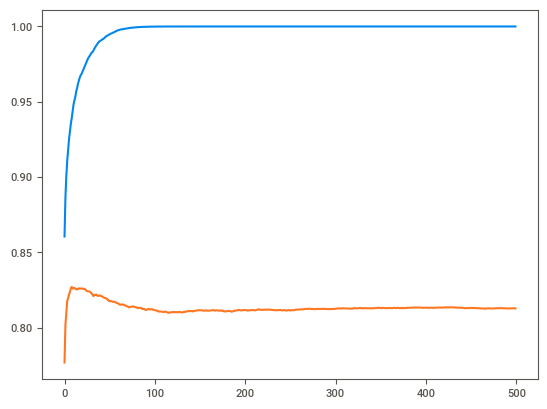

In [69]:
plt.plot(cv_results['train-auc-mean'])
plt.plot(cv_results['test-auc-mean']);

### Hyperparameter tuning

* `eta` -> learning rate
* `max_depth`-> maximum allowed depth for each tree
* `min_child_weight` -> Minimal number of observation in each group (same as `min_leaf_size`)

### Hyperparameter tuning

#### Learning rate

In [70]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'seed': 1,
    'verbosity': 0
}

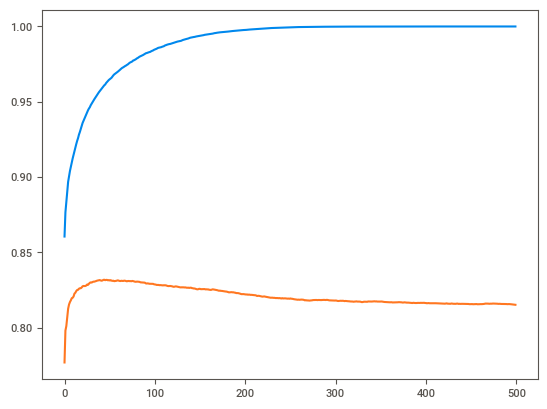

In [71]:
cv_results = xgb.cv(xgb_params, train_dm, num_boost_round = 500, nfold=5, metrics={'auc'}, seed=123)
plt.plot(cv_results['train-auc-mean'])
plt.plot(cv_results['test-auc-mean']);

In [72]:
np.max(cv_results['test-auc-mean'])

0.8318558987853291

In [74]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'seed': 1,
    'verbosity': 0
}

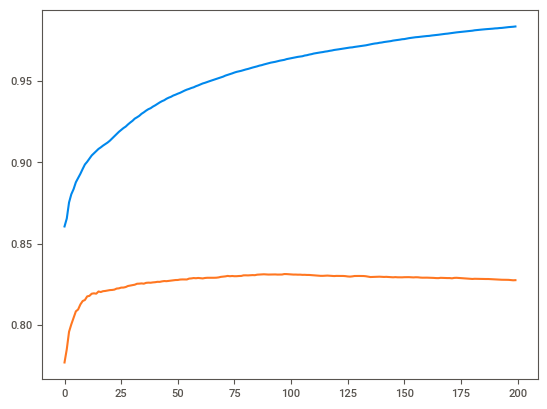

In [75]:
cv_results = xgb.cv(xgb_params, train_dm, num_boost_round = 200, nfold=5, metrics={'auc'}, seed=123)
plt.plot(cv_results['train-auc-mean'])
plt.plot(cv_results['test-auc-mean']);

In [76]:
np.max(cv_results['test-auc-mean'])

0.8312755845515323

#### Maximum Depth

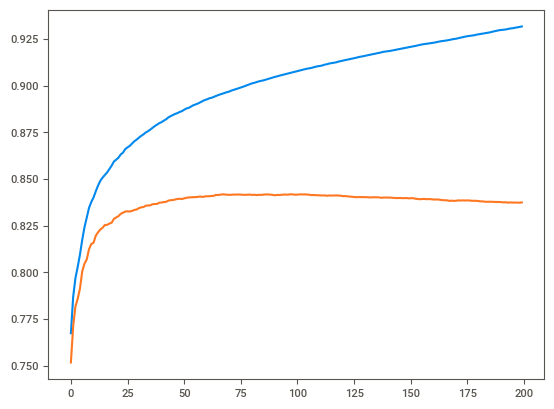

In [77]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'seed': 1,
    'verbosity': 0
}
cv_results = xgb.cv(xgb_params, train_dm, num_boost_round = 200, nfold=5, metrics={'auc'}, seed=123)
plt.plot(cv_results['train-auc-mean'])
plt.plot(cv_results['test-auc-mean']);

In [78]:
np.max(cv_results['test-auc-mean'])

0.8418058656095034

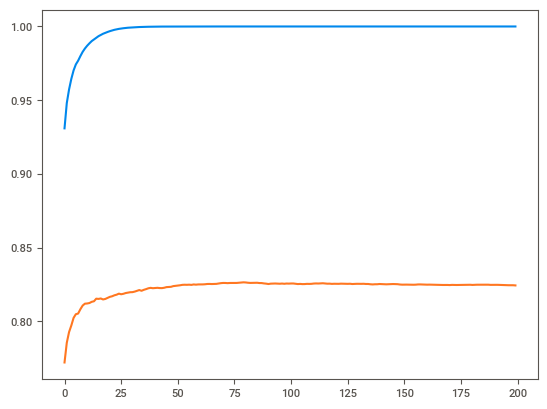

In [79]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 12,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'seed': 1,
    'verbosity': 0
}
cv_results = xgb.cv(xgb_params, train_dm, num_boost_round = 200, nfold=5, metrics={'auc'}, seed=123)
plt.plot(cv_results['train-auc-mean'])
plt.plot(cv_results['test-auc-mean']);

In [80]:
np.max(cv_results['test-auc-mean'])

0.82653480776133

#### Leaf size

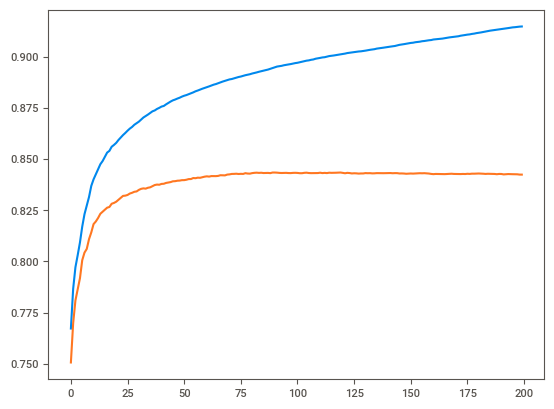

In [81]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 10,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'seed': 1,
    'verbosity':0
}
cv_results = xgb.cv(xgb_params, train_dm, num_boost_round = 200, nfold=5, metrics={'auc'}, seed=123)
plt.plot(cv_results['train-auc-mean'])
plt.plot(cv_results['test-auc-mean']);

In [82]:
np.max(cv_results['test-auc-mean'])

0.8434460240073147

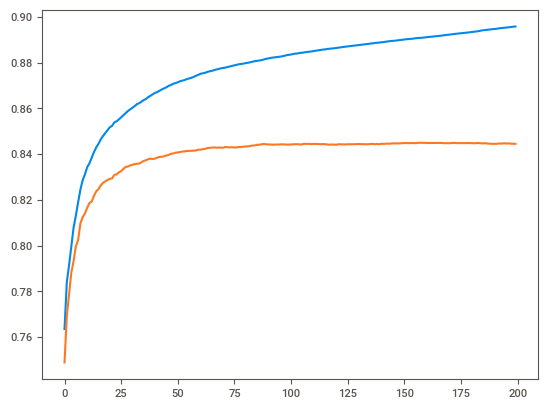

In [83]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'seed': 1,
    'verbosity': 0
}
cv_results = xgb.cv(xgb_params, train_dm, num_boost_round = 200, nfold=5, metrics={'auc'}, seed=123)
plt.plot(cv_results['train-auc-mean'])
plt.plot(cv_results['test-auc-mean']);

In [84]:
np.max(cv_results['test-auc-mean'])

0.8449336179976819

#### Retrain on full data

In [85]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'seed': 1,
    'verbosity': 0
}

Add watchlist for training

In [86]:
watchlist = [(train_dm, 'train')]

In [87]:
xgb_model =  xgb.train(xgb_params, 
                 train_dm, 
                 num_boost_round = 100, 
                 evals = watchlist, 
                 verbose_eval = 10 )

[0]	train-auc:0.76635
[10]	train-auc:0.83536
[20]	train-auc:0.85150
[30]	train-auc:0.86078
[40]	train-auc:0.86656
[50]	train-auc:0.87035
[60]	train-auc:0.87385
[70]	train-auc:0.87702
[80]	train-auc:0.87897
[90]	train-auc:0.88120
[99]	train-auc:0.88256


### Evaluate on test set

#### Data processing for test set

In [88]:
y_test_enc = y_test.map(status_enc)
print(y_test[:5], y_test_enc[:5])

4171    default
1912         ok
2546    default
2613         ok
15           ok
Name: Status, dtype: object 4171    0
1912    1
2546    0
2613    1
15      1
Name: Status, dtype: int64


In [89]:
test_dm = xgb.DMatrix(X_test_fe, y_test_enc, feature_names=list(X_test_fe.columns))

In [90]:
y_pred = xgb_model.predict(test_dm)
y_pred[:5]

array([0.9532038 , 0.992747  , 0.17586356, 0.325344  , 0.9298945 ],
      dtype=float32)

In [91]:
roc_auc_score(y_test_enc, y_pred)

0.8449959013339295

#### Feature importance

Feature weights

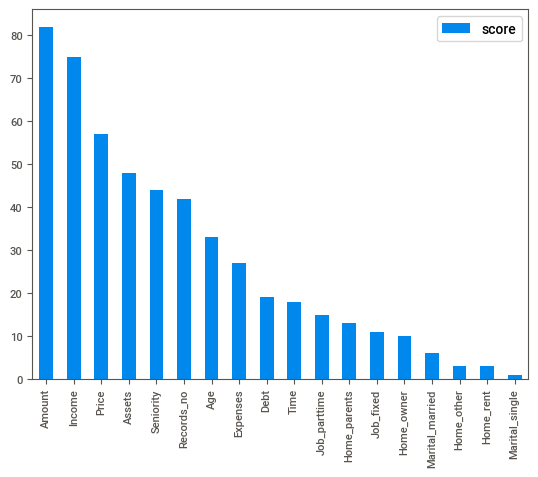

In [92]:
feature_importance = xgb_model.get_score(importance_type='weight')
keys = list(feature_importance.keys())
values = list(feature_importance.values())

feature_importance_df = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
feature_importance_df.plot(kind = 'bar');

Partial Dependence Plots

In [93]:
def partial_dependence_score(xgboost_model, X, y, col, values):
    results = []
    for value in values:
        X_copy = X.copy()
        X_copy[col] = value
        y_mean = np.mean(xgboost_model.predict(xgb.DMatrix(X_copy, y, feature_names=list(X_copy.columns))))
        results.append(y_mean)
    return np.array(results)

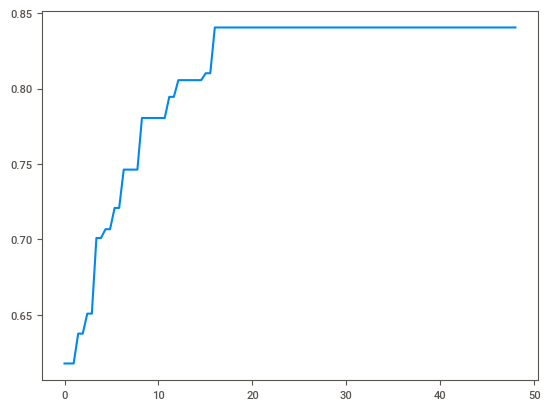

In [94]:
pdp_feature_name = 'Seniority'
pdp_feature = np.linspace(X_train_fe[pdp_feature_name].min(), X_train_fe[pdp_feature_name].max(), 100)

avg_pd = partial_dependence_score(xgb_model, X_train_fe, y_train_enc, pdp_feature_name, pdp_feature)

plt.plot(pdp_feature, avg_pd)
plt.show() 

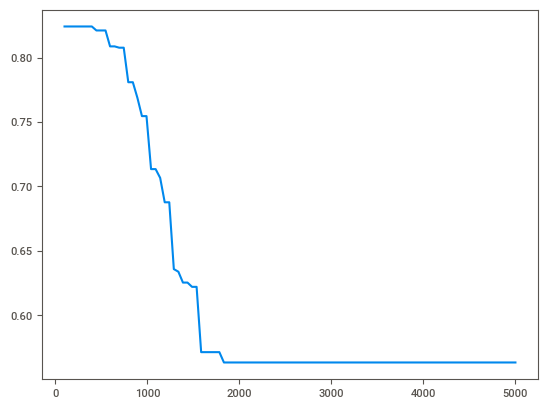

In [95]:
pdp_feature_name = 'Amount'
pdp_feature = np.linspace(X_train_fe[pdp_feature_name].min(), X_train_fe[pdp_feature_name].max(), 100)

avg_pd = partial_dependence_score(xgb_model, X_train_fe, y_train_enc, pdp_feature_name, pdp_feature)

plt.plot(pdp_feature, avg_pd)
plt.show() 

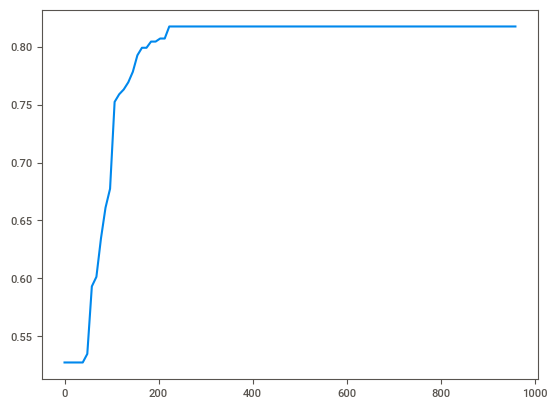

In [96]:
pdp_feature_name = 'Income'
pdp_feature = np.linspace(X_train_fe[pdp_feature_name].min(), X_train_fe[pdp_feature_name].max(), 100)

avg_pd = partial_dependence_score(xgb_model, X_train_fe, y_train_enc, pdp_feature_name, pdp_feature)

plt.plot(pdp_feature, avg_pd)
plt.show() 